# Winter 2019 Data Science Intern Challenge

## Question 1

To aid the reviewers I have include a summary of my results and conclusions for question 1 below. Following question 2 is a section titled "Detailed Workthrough" that shows my thought process and exploration of the data as I came to these conclusions, as well as the code and plots I made to determine all of the results. I have structured the Detailed Workthrough so a reviewer can read through it and understand how I came to my conclusions, step by step, and gives the context for the answers below. These conclusions are also included in the detailed work through. 

### a Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

The reason that the AOV failed is that the data contains significant outliers. I found two types of outliers. The first is for *shop_id* = 42. It has orders that can be classified as outliers and others that are not outliers. The outliers for this shop are outliers for both *order_amount* and *total_items*. Due to the identical nature of a strip plot for both of these attributes it is easy to see that the high *order_amount* is due to a high *total_items* for particular orders. The second outlier type is that seen with *shop_id* = 78. This shop has a high *order_amount* but does not have high *total_items*. The high order price appears to be solely due to a high sneaker price. 

### b. What metric would you report for this dataset?

My approach was to find a metric for the average sneaker price and the average total items in an order. The average order value is just a product of those two values.Due to the significant difference of the outliers from the remaineder of the other data a simple product of averages will not give a sufficiently informative summary statistics. It is best to calculate the means of sneaker price and *total_items* with outlier removed and make average order metric based on the product of those values and simply note the outliers in situations where it is relevant. 

The outlier corrected average order value (OCAOV) is then $mean(total\_items_{outlier\;removed})*mean(sneaker\_price_{outlier\;removed})$

### c. What is its value?

The metric I named OCAOV resutls in a much more reasonable order value of $303.61 

## Question 2: For this question you’ll need to use SQL. 

### a. How many orders were shipped by Speedy Express in total?

#### Query : 

SELECT COUNT(OrderID) FROM [Orders] <br>
INNER JOIN Shippers <br>
ON Orders.ShipperID = Shippers.ShipperID  
WHERE ShipperName = 'Speedy Express' <br>

#### Output : 

COUNT(OrderID)<br>
54<br>

### b. What is the last name of the employee with the most orders?

#### Query :
SELECT LastName FROM [Employees]<br>
INNER JOIN Orders<br>
ON Orders.EmployeeID = Employees.EmployeeID<br> 
GROUP BY Employees.EmployeeID<br>
ORDER BY COUNT(OrderID) DESC <br>
LIMIT 1

#### Output : 
LastName<br>
Peacock 	

### c. What product was ordered the most by customers in Germany?

#### Query : 
SELECT ProductName FROM [Products] <br>
INNER JOIN OrderDetails <br>
ON Products.ProductID = OrderDetails.ProductID <br>
INNER JOIN Orders<br>
ON OrderDetails.OrderID = Orders.OrderID<br>
Where CustomerID IN( SELECT CustomerID FROM [Customers] WHERE Country='Germany' )<br>
GROUP BY ProductName <br>
ORDER BY SUM(Quantity) DESC<br>
LIMIT 1

#### Output : 
ProductName<br>
Boston Crab Meat 


## Question 1 : Detailed Work Through 

#### Import Libraries 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

#### Load and Preview Data 

In [2]:
sneaker_data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
sneaker_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [21]:
sneaker_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


While looking at the data I noticed that certain orders had large order_amounts. The first that stuck out has *shop_id=42*. Searching for this again the shop orders tended to have high volume and this drove this caused the order_amount to be anomolous. Through this quick visual inspection I notice some orders had low *total_items* but also had high *order_amount*. These shops seemed to sell very expensive shoes. To better visual the data and types of orders in particular I will perform some visualization. 


To confirm that *order_amount* contains the monetary value refered to in the question I will check that the mean *order_amount* matches the previously stated AOV

In [3]:
sneaker_data['order_amount'].mean()

3145.128

#### Plots exploring *shop_id* versus *order_amount*

Text(0.5,1,'Scatter Plot of shop_id and order_amount')

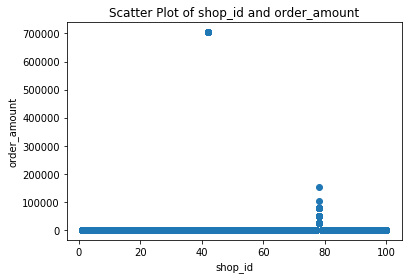

In [57]:

plt.scatter(sneaker_data['shop_id'],sneaker_data['order_amount'])
plt.xlabel('shop_id')
plt.ylabel('order_amount')
plt.title('Scatter Plot of shop_id and order_amount')

It may be clearer looking at this data with a few different methods. A box plot is a good way to look at this data because it shows the distrubtion as well as outliers. A strip plot can also compliment this plot. 

Text(0.5,1,'Boxplot of shop_id and order_amount')

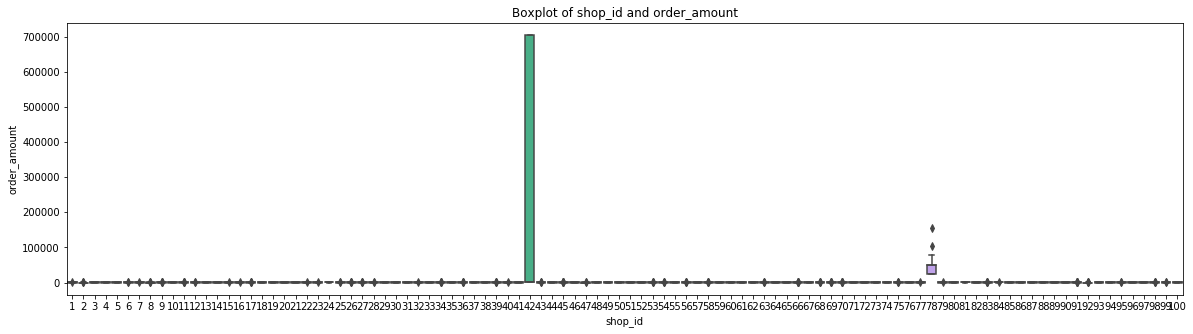

In [59]:

plt.subplots(figsize=(20,5))
sns.boxplot(x='shop_id', y='order_amount', data=sneaker_data)
plt.title('Boxplot of shop_id and order_amount')


The outliers still make data hard to view. It makes sense to view the data with the outliers removed as well as the two outliers seperately. 

Text(0.5,1,'Box Plot With Outliers Removed')

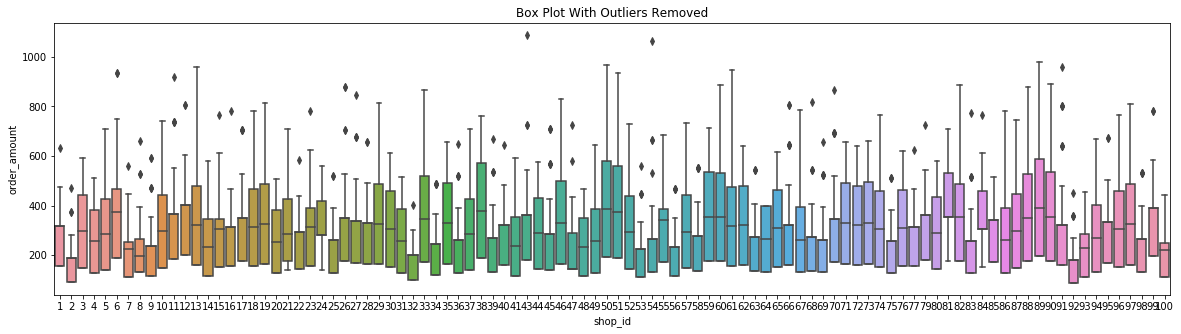

In [53]:
sneaker1 = sneaker_data [(sneaker_data['shop_id'] != 42) & (sneaker_data['shop_id'] != 78)]
plt.subplots(figsize=(20,5))
sns.boxplot(x='shop_id', y='order_amount', data=sneaker1)
plt.title('Box Plot With Outliers Removed')

Text(0.5,1,'Strip Plot With Outliers Removed')

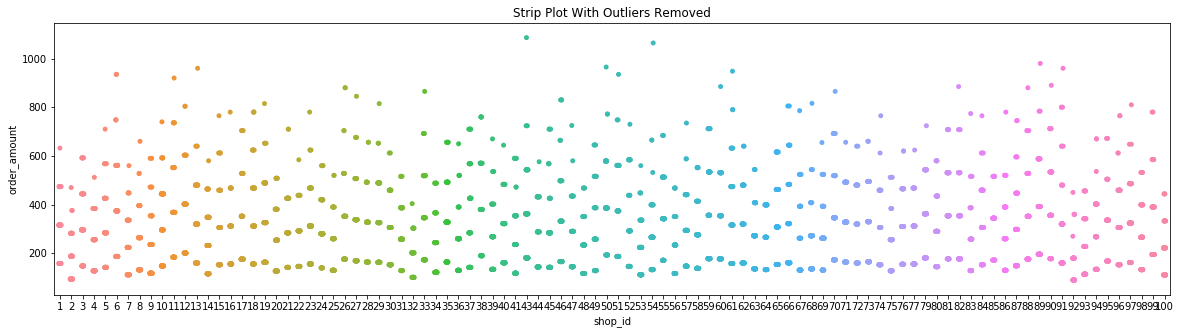

In [54]:
plt.subplots(figsize=(20,5))
sns.stripplot(x='shop_id', y='order_amount', data=sneaker1,jitter=True)
plt.title('Strip Plot With Outliers Removed')

Text(0.5,0.98,'Box Plots For Outliers')

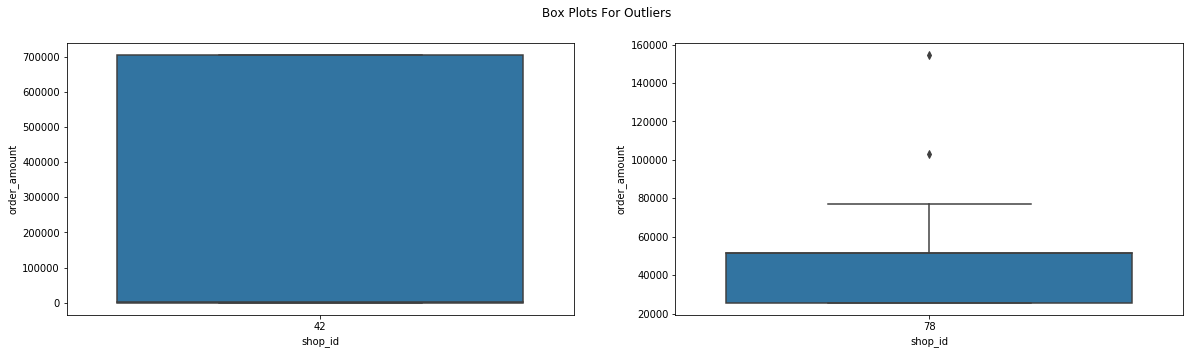

In [55]:
sneaker42 = sneaker_data[sneaker_data['shop_id']==42]
sneaker78 = sneaker_data[sneaker_data['shop_id']==78]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x='shop_id', y='order_amount', data=sneaker42, ax=ax1)
sns.boxplot(x='shop_id', y='order_amount', data=sneaker78, ax=ax2)
plt.suptitle('Box Plots For Outliers')

Text(0.5,0.98,'Stip Plots For Outliers')

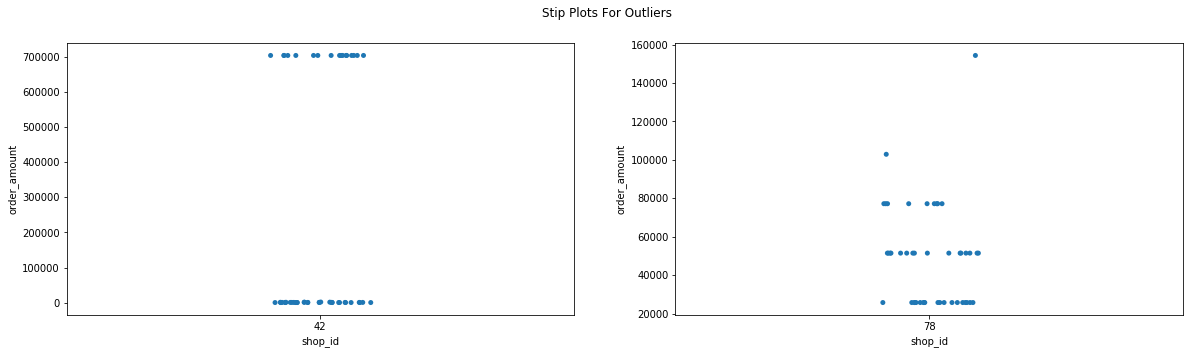

In [56]:

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.stripplot(x='shop_id', y='order_amount', data=sneaker42, ax=ax1, jitter=True)
sns.stripplot(x='shop_id', y='order_amount', data=sneaker78, ax=ax2, jitter=True)
plt.suptitle('Stip Plots For Outliers')


It is is important to note that the shop with *shop_id* = 42 has sales with both outlier *order_amount* and those that fall in the range of others. It was difficult to see until the strip plot as large *order_amount* points obscured the low *order_amount* points due to being a magnitude of order larger despite there being a fair number of the low *order_amount* points.   

#### Plots exploring *shop_id* versus *total_items* 

Text(0.5,1,'Scatter Plot of shop_id and total_items')

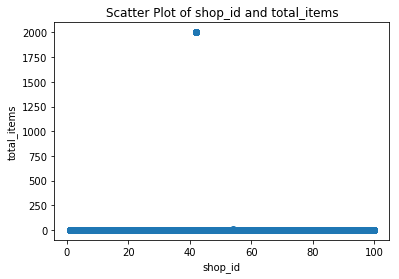

In [58]:
plt.scatter(sneaker_data['shop_id'],sneaker_data['total_items'])
plt.xlabel('shop_id')
plt.ylabel('total_items')
plt.title('Scatter Plot of shop_id and total_items')

The only major outlier in total_items appears to be *shop_id* = 42. It is worth exploring box plots and strip plots as before. 

Text(0.5,1,'Box Plot of shop_id and total_items')

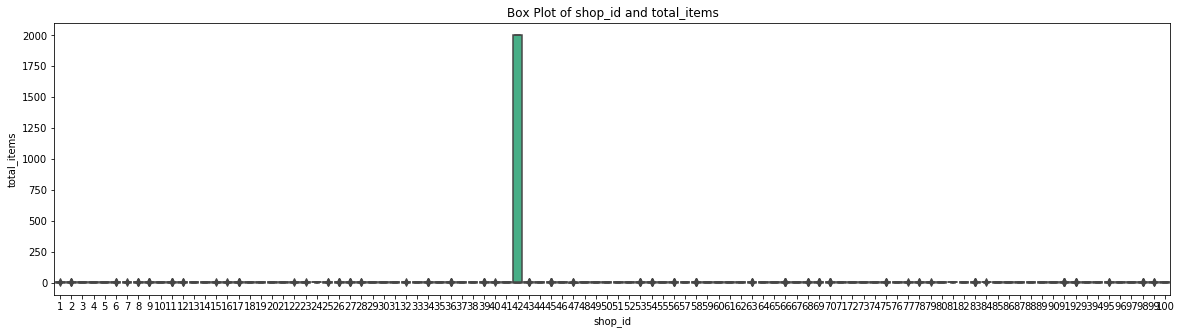

In [60]:
plt.subplots(figsize=(20,5))
sns.boxplot(x='shop_id', y='total_items', data=sneaker_data)
plt.title('Box Plot of shop_id and total_items')

Once again the difference in value between the outlier and the rest of the data makes the plot difficult to use. I will compare the plot of the non-outlier data and outlier data once again 

Text(0.5,1,'Box Plot With Outliers Removed')

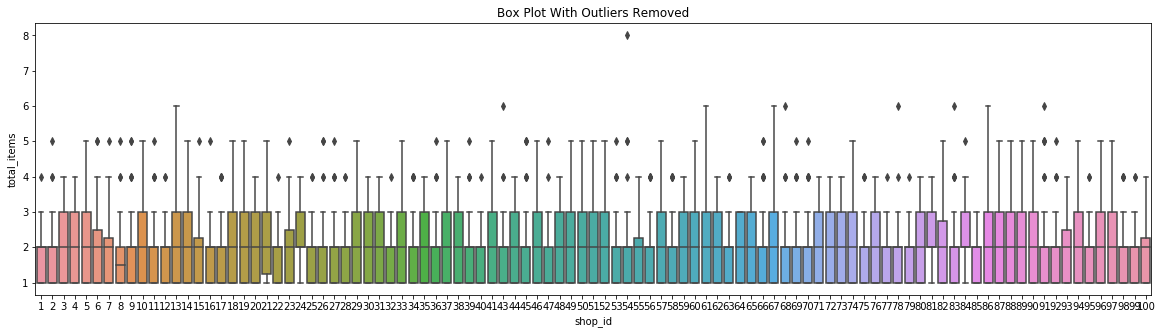

In [62]:
sneaker2 = sneaker_data [(sneaker_data['shop_id'] != 42)] #make new non outlier set as this this time I should include shop_id=78
plt.subplots(figsize=(20,5))
sns.boxplot(x='shop_id', y='total_items', data=sneaker2)
plt.title('Box Plot With Outliers Removed')

Text(0.5,1,'Strip Plot With Outliers Removed')

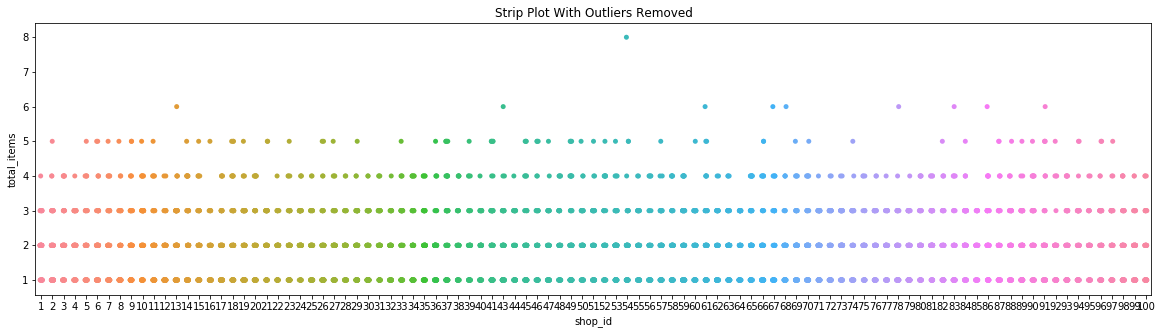

In [63]:
plt.subplots(figsize=(20,5))
sns.stripplot(x='shop_id', y='total_items', data=sneaker2,jitter=True)
plt.title('Strip Plot With Outliers Removed')

Text(0.5,1,'Strip Plot')

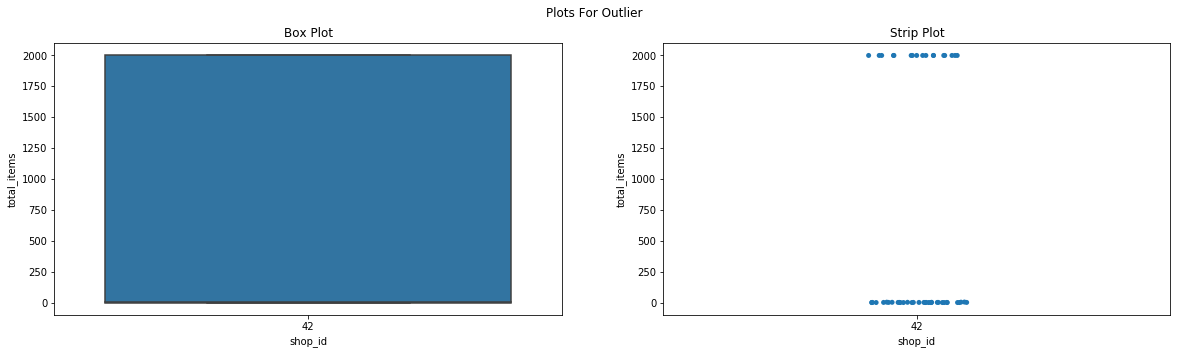

In [68]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x='shop_id', y='total_items', data=sneaker42, ax=ax1),
sns.stripplot(x='shop_id', y='total_items', data=sneaker42, ax=ax2, jitter=True)
plt.suptitle('Plots For Outlier')
ax1.set_title('Box Plot')
ax2.set_title('Strip Plot')


#### Part a conclusions 

The reason that the AOV failed is that the data contains significant outliers. I found two types of outliers. The first is for *shop_id* = 42. It has orders that can be classified as outliers and others that are not outliers. The outliers for this shop are outliers for both *order_amount* and *total_items*. Due to the identical nature of a strip plot for both of these attributes it is easy to see that the high *order_amount* is due to a high *total_items* for particular orders. The second outlier type is that seen with *shop_id* = 78. This shop has a high *order_amount* but does not have high *total_items*. The high order price appears to be solely due to a high sneaker price. 

### b. What metric would you report for this dataset?


Averaging the order_value without outliers will likely return a better results but other metrics will be more informative 

Another thing to consider is that price is the product of *total_items* and *sneaker price*. An average of products is different than the product of averages. The intial attempt was an average of products. By instead taking the product of average *total_items* and average *sneaker price* a better metric may be achieved. A product of averages could work better as multiplying each large order by its sneaker price grows the difference between the anomolous and non anomolous orders. The difference between low and high *total_items*  for shop_id=42 is on the order of $10^3$ while for *order_amount* this becomes closer to the order of $10^4$. 

To determine the best metric exploring some statistics of the data will be helpful. 

#### Develop metric for sneaker price

In [122]:
sneaker_data['sneaker_price'] = sneaker_data.apply(lambda order: order['order_amount']/order['total_items'], axis=1)
sneaker_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,sneaker_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [125]:
#can use mean to extract each shops sneaker prices as each shop only sells one 
#sneaker and thus there is no variance in a shops sneaker price across orders (confirmed this for data personally)
sneaker_price=sneaker_data.groupby('shop_id').mean()['sneaker_price']
sneaker_price.head()

shop_id
1    158.0
2     94.0
3    148.0
4    128.0
5    142.0
Name: sneaker_price, dtype: float64

Mean Sneaker Price
407.99
Standard Deviation Sneaker Price
2557.462905899224


Text(0.5,1,'Distribution Of Sneaker Price With Prices Above 250 Filtered Out ')

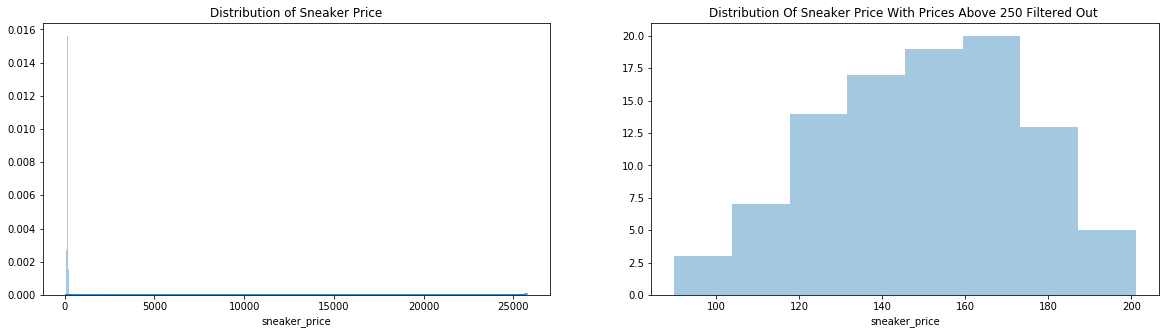

In [133]:
print('Mean Sneaker Price')
print(sneaker_price.mean())
print('Standard Deviation Sneaker Price')
print(sneaker_price.std())

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(sneaker_price, bins=1000, ax=ax1)
sns.distplot(sneaker_price[sneaker_price < 250], ax=ax2, kde=False)
ax1.set_title('Distribution of Sneaker Price')
ax2.set_title('Distribution Of Sneaker Price With Prices Above 250 Filtered Out ')

It is clear from this that the high price of *shop_id*=78 is skewing the distrubution greatly. It would be a poor choice to include this when trying to produce meaningful summary statistics . Using this shops sneaker price when calculating the mean shifts the mean higher than the second most expensive shoe's price. 

In [102]:
print('Two Highest Sneaker Prices')
sneaker_price.nlargest(2)

Two Highest Sneaker Prices


shop_id
78    25725.0
42      352.0
Name: sneaker_price, dtype: float64

The mean and standard deviation of the sneaker prices are significantly different when the outlier shop (*shop_id*=78) are removed.

In [120]:
sneaker_price=sneaker_price.reset_index()
price_mean= sneaker_price[sneaker_price['shop_id']!=78]['sneaker_price'].mean()
price_std= sneaker_price[sneaker_price['shop_id']!=78]['sneaker_price'].std()
print('Mean without outlier')
print(price_mean)
print('Standard deviation without outlier')
print(price_std)

Mean without outlier
152.26262626262627
Standard deviation without outlier
31.263718901675414


#### Develop metric for total_items 


Mean Total Items
8.7872
Standard Deviation Total Items
116.32031980492717


Text(0.5,1,'Distribution Of Total Items With Counts Above 10 Filtered Out ')

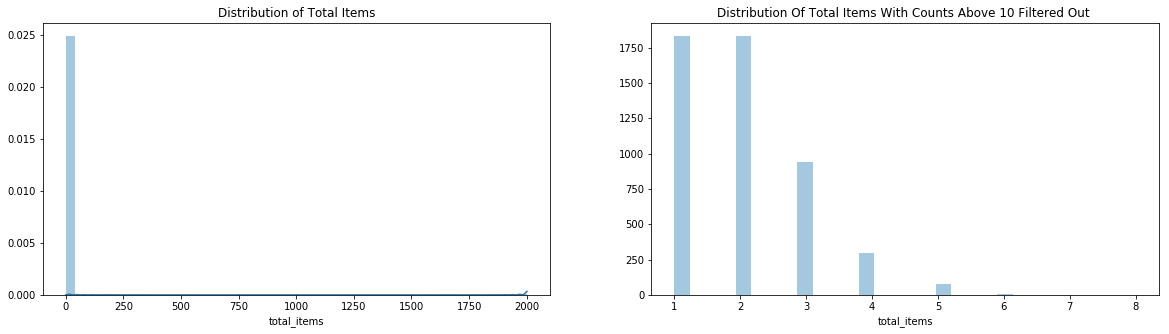

In [134]:
print('Mean Total Items')
print(sneaker_data['total_items'].mean())
print('Standard Deviation Total Items')
print(sneaker_data['total_items'].std())

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(sneaker_data['total_items'], ax=ax1)
sns.distplot(sneaker_data['total_items'][sneaker_data['total_items']< 10], ax=ax2,kde=False)
ax1.set_title('Distribution of Total Items')
ax2.set_title('Distribution Of Total Items With Counts Above 10 Filtered Out ')

Again it is clear that outliers are skewing the distribution. It would be a poor choice to include the orders of the shop *shop_id*=42 that item totals of 2000 when trying to produce meaningful summary statistics . Using this large item totals when calculating the mean shifts the mean higher than the next highest item count. Contrary to the prices of *shop_id*=78 some of the orders of *shop_id*=42 are normal and thus can be included. To do this I need to filter the data not by *shop_id* but by *total_items*. 

In [139]:
print('Highest total_items')
sneaker_data['total_items'].nlargest(20)

Highest total_items


15      2000
60      2000
520     2000
1104    2000
1362    2000
1436    2000
1562    2000
1602    2000
2153    2000
2297    2000
2835    2000
2969    2000
3332    2000
4056    2000
4646    2000
4868    2000
4882    2000
4141       8
691        6
1563       6
Name: total_items, dtype: int64

The mean and standard deviation of the *total_items* are significantly different when the outlier totals (*total_items*=2000) are removed.

In [141]:
item_mean= sneaker_data[sneaker_data['total_items']<2000]['total_items'].mean()
item_std= sneaker_data[sneaker_data['total_items']<2000]['total_items'].std()
print('Mean without outlier')
print(item_mean)
print('Standard deviation without outlier')
print(item_std)

Mean without outlier
1.9939795304033714
Standard deviation without outlier
0.9831804487701367


#### Part b conclusions

Due to the significant difference of the outliers from the remaineder of the other data a simple product of averages will not give a sufficiently informative summary statistics. It is best to calculate the means of sneaker price and *total_items* with outlier removed and make average order metric based on the product of those values and simply note the outliers in situations where it is relevant. 

The outlier corrected average order value (OCAOV) is then $mean(total\_items_{outlier\;removed})*mean(sneaker\_price_{outlier\;removed})$

### c. What is its value?


The metric I named OCAOV is computed below

In [142]:
ocaov = item_mean*price_mean 
print('OCAOV metric ')
print(ocaov)

OCAOV metric 
303.60856001313556


This metric thus results in a much more reasonable order value of $303.61 